In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

## Load directed adjacency matrices for different heterogenous relations 

In [ ]:
drug_moa_df = pd.read_csv('/content/drive/MyDrive/Thesis_5_1/data/directed matrices/drug-MOA-adj.csv')
drug_contraindication_df = pd.read_csv('/content/drive/MyDrive/Thesis_5_1/data/directed matrices/drug-contraindication-adj.csv')
drug_drug_intraction_df = pd.read_csv('/content/drive/MyDrive/Thesis_5_1/data/directed matrices/drug-drug-interaction-adj.csv')
drug_indication_df = pd.read_csv('/content/drive/MyDrive/Thesis_5_1/data/directed matrices/drug-indication-adj.csv')
drug_pathway_df = pd.read_csv('/content/drive/MyDrive/Thesis_5_1/data/directed matrices/drug-pathway-adj.csv')
drug_target_df = pd.read_csv('/content/drive/MyDrive/Thesis_5_1/data/directed matrices/drug-target-adj.csv')
drug_df = pd.read_csv('/content/drive/MyDrive/Thesis_5_1/data/drug-nodes.csv')

## Functions for formatting the data, elbow method & clustering


In [ ]:
def load_data(df_org):
  df = df_org.copy()
  le = LabelEncoder()
  y = df['Name']
  df['Name'] = le.fit_transform(df['Name'])
  y = le.transform(y)
  cols = df.columns
  ms = MinMaxScaler()
  X = ms.fit_transform(df)
  X = pd.DataFrame(X, columns=[cols])
  return df,y,X

In [ ]:
def k_means_elbow_method(X,title):
  cs = []
  for i in range(1,100):
      kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
      kmeans.fit(X)
      cs.append(kmeans.inertia_)
  plt.plot(range(1,100), cs)
  plt.title('The Elbow Method '+title)
  plt.xlabel('Number of clusters')
  plt.ylabel('CS')
  plt.show()

In [ ]:
def k_means_clustering(nclusters,X):
  kmeans = KMeans(n_clusters=nclusters, random_state=0) 
  kmeans.fit(X)
  kmeans.cluster_centers_
  print(kmeans.inertia_)
  return kmeans.labels_

In [ ]:
def make_df(labels,y,name,df_org):
  df = pd.DataFrame({'node-value':y, 'cluster-label':labels})
  df['drug'] = df_org['Name']
  df = df.sort_values('cluster-label')
  fileName = '/content/drive/MyDrive/Thesis_5_1/data/Level 1 clustering/' + name
  df.to_csv(fileName)
  return df

In [ ]:
def complete_df(df,drug_full,name):
  df = df.drop('node-value', axis=1)
  drug_subset = df['drug'].tolist()
  missing_drug = list(set(drug_full)-set(drug_subset))
  xtra = {'drug': missing_drug}
  df = df.append(pd.DataFrame(xtra))
  fileName = '/content/drive/MyDrive/Thesis_5_1/data/L1 intermediate DDR results/' + name
  df.to_csv(fileName)
  return df

In [ ]:
drug_full = drug_df['Name'].tolist()

## Clusters for relation: Drug-MOA

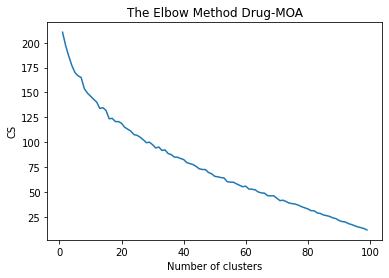

In [ ]:
df_drug_moa,y_drug_moa,X_drug_moa = load_data(drug_moa_df)
k_means_elbow_method(X_drug_moa,'Drug-MOA')
# 30 seems appropriate 

In [ ]:
label_drug_moa = k_means_clustering(20,X_drug_moa)
df_new_drug_moa = make_df(label_drug_moa,y_drug_moa,'Drug-MOA.csv',drug_moa_df)
print("Drug-MOA")
cm = sns.light_palette("seagreen", as_cmap=True)
df_new_drug_moa["cluster-label"].value_counts(dropna=False).to_frame().style.background_gradient(cmap=cm)

118.96978066927562
Drug-MOA


,cluster-label
18,32
2,22
16,22
11,13
8,12
10,10
4,8
7,8
15,8
13,7


In [ ]:
type(label_drug_moa)

numpy.ndarray

In [ ]:
complete_df(df_new_drug_moa,drug_full,'Drug-MOA.csv')

## Clusters for relation: Drug-Contraindication

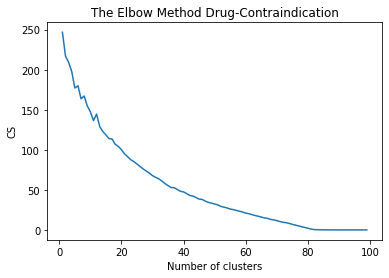

In [ ]:
df_drug_contraindication,y_drug_contraindication,X_drug_contraindication = load_data(drug_contraindication_df)
k_means_elbow_method(X_drug_contraindication,'Drug-Contraindication')
# 30 seems appropriate 

In [ ]:
label_drug_contraindication = k_means_clustering(5,X_drug_contraindication)
df_new_drug_contraindication = make_df(label_drug_contraindication,y_drug_contraindication,'Drug-Contraindication.csv',drug_contraindication_df)
print("Drug-Contraindication")
cm = sns.light_palette("seagreen", as_cmap=True)
df_new_drug_contraindication["cluster-label"].value_counts(dropna=False).to_frame().style.background_gradient(cmap=cm)

177.14515939695207
Drug-Contraindication


,cluster-label
0,100
4,36
1,1
2,1
3,1


In [ ]:
complete_df(df_new_drug_contraindication,drug_full,'Drug-Contraindication.csv')

## Clusters for relation: Drug-Drug-Interaction

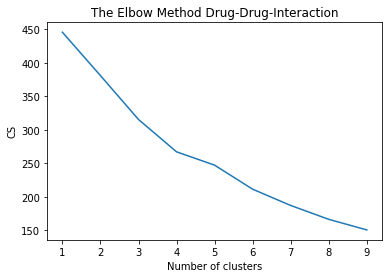

In [ ]:
df_drug_drug_intraction,y_drug_drug_intraction,X_drug_drug_intraction = load_data(drug_drug_intraction_df)
k_means_elbow_method(X_drug_drug_intraction,'Drug-Drug-Interaction')
# 5 seems appropriate 

In [ ]:
label_drug_drug_intraction = k_means_clustering(5,X_drug_drug_intraction)
df_new_drug_drug_intraction = make_df(label_drug_drug_intraction,y_drug_drug_intraction,'Drug-Drug-Interaction.csv',drug_drug_intraction_df)
print("Drug-Drug-Interaction")
cm = sns.light_palette("seagreen", as_cmap=True)
df_new_drug_drug_intraction["cluster-label"].value_counts(dropna=False).to_frame().style.background_gradient(cmap=cm)

247.11713142505386
Drug-Drug-Interaction


,cluster-label
1,50
2,3
3,2
4,2
0,1


In [ ]:
complete_df(df_new_drug_drug_intraction,drug_full,'Drug-Drug-Interaction.csv')

## Clusters for relation: Drug-Indication

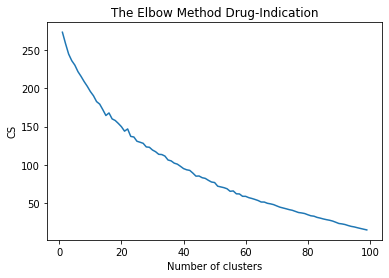

In [ ]:
df_drug_indication,y_drug_indication,X_drug_indication = load_data(drug_indication_df)
k_means_elbow_method(X_drug_indication,'Drug-Indication')
# 20 seems appropriate 

In [ ]:
label_drug_indication = k_means_clustering(20,X_drug_indication)
df_new_drug_indication = make_df(label_drug_indication,y_drug_indication,'Drug-Indication.csv',drug_indication_df)
print("Drug-Indication")
cm = sns.light_palette("seagreen", as_cmap=True)
df_new_drug_indication["cluster-label"].value_counts(dropna=False).to_frame().style.background_gradient(cmap=cm)

149.8863409481063
Drug-Indication


,cluster-label
12,45
18,23
10,15
19,15
13,13
0,11
1,9
3,9
14,9
6,8


In [ ]:
complete_df(df_new_drug_indication,drug_full,'Drug-Indication.csv')

## Clusters for relation: Drug-Pathway

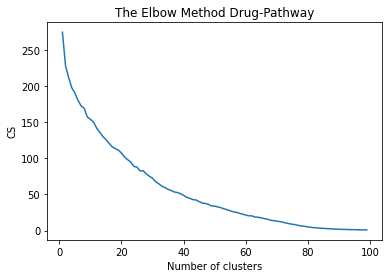

In [ ]:
df_drug_pathway,y_drug_pathway,X_drug_pathway = load_data(drug_pathway_df)
k_means_elbow_method(X_drug_pathway,'Drug-Pathway')
# 20 seems appropriate 

In [ ]:
label_drug_pathway = k_means_clustering(20,X_drug_pathway)
df_new_drug_pathway = make_df(label_drug_pathway,y_drug_pathway,'Drug-Pathway.csv',drug_pathway_df)
print("Drug-Pathway")
cm = sns.light_palette("seagreen", as_cmap=True)
df_new_drug_pathway["cluster-label"].value_counts(dropna=False).to_frame().style.background_gradient(cmap=cm)

107.28625639132215
Drug-Pathway


,cluster-label
5,24
13,17
8,16
1,12
4,11
3,10
6,10
2,8
0,6
12,6


In [ ]:
complete_df(df_new_drug_pathway,drug_full,'Drug-Pathway.csv')

## Clusters for relation: Drug-Target

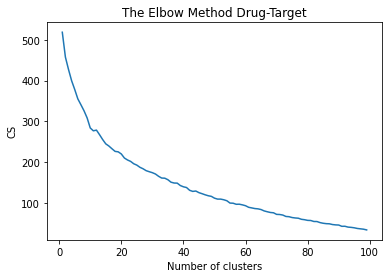

In [ ]:
df_drug_target,y_drug_target,X_drug_target = load_data(drug_target_df)
k_means_elbow_method(X_drug_target,'Drug-Target')
# 15 seems appropriate 

In [ ]:
label_drug_target = k_means_clustering(20,X_drug_target)
df_new_drug_target = make_df(label_drug_target,y_drug_target,'Drug-Target.csv',drug_target_df)
print("Drug-Target")
cm = sns.light_palette("seagreen", as_cmap=True)
df_new_drug_target["cluster-label"].value_counts(dropna=False).to_frame().style.background_gradient(cmap=cm)

219.74345632999484
Drug-Target


,cluster-label
7,33
8,32
1,18
16,15
10,11
3,7
9,6
14,5
5,5
0,4


In [ ]:
complete_df(df_new_drug_target,drug_full,'Drug-Target.csv')